In [ ]:
!pip install pdf2image

In [ ]:
!pip install pytesseract

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
!apt install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.7 [186 kB]
Fetched 186 kB in 0s (425 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.7_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.7) ...
Setting up poppler-utils (22.02.0-2ubuntu0.7) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-ara
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 645 kB of archives.
After this operation, 1,447 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 645 kB in 1s (1,202 kB/s)
Selecting previously unselected package tesseract-ocr-ara.
(Reading database ... 126363 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-ara_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-ara (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-ara (1:4.00~git30-7274cfa-1.1) ...


In [ ]:
import os
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import io

# Path to the input PDF file. Modify at as needed
filePath = '/content/test_20.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Translated text saved at: {output_text_path}")

Processing page number -  0
Combined PDF saved at: test_20_OCR_combined.pdf
Translated text saved at: test_20_Arabic.txt


Processing page number -  0


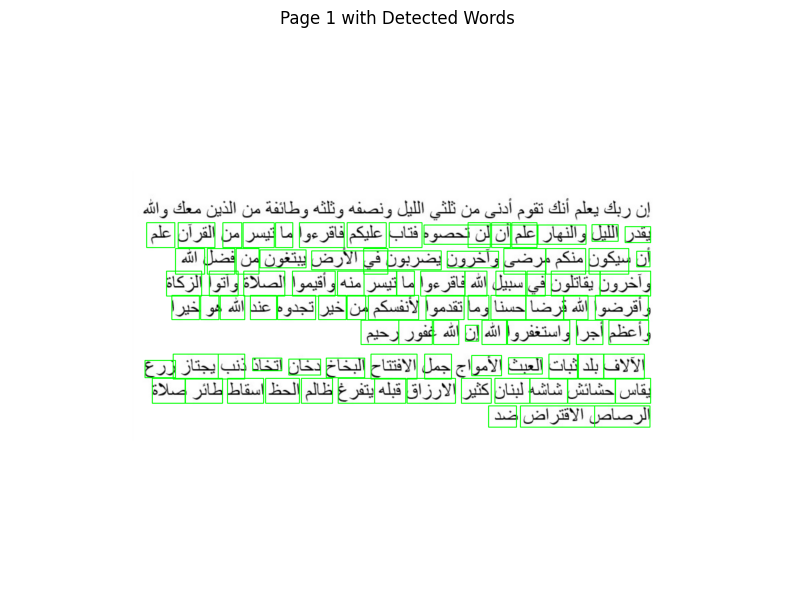

Combined PDF saved at: test_20_OCR_combined.pdf
Arabic OCR text saved at: test_20_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/test_20.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


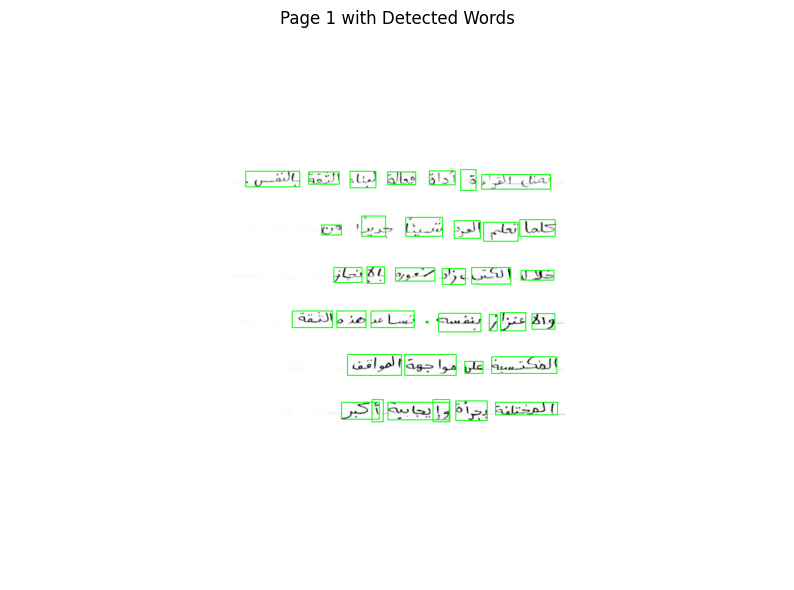

Combined PDF saved at: t2_OCR_combined.pdf
Arabic OCR text saved at: t2_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/t2.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


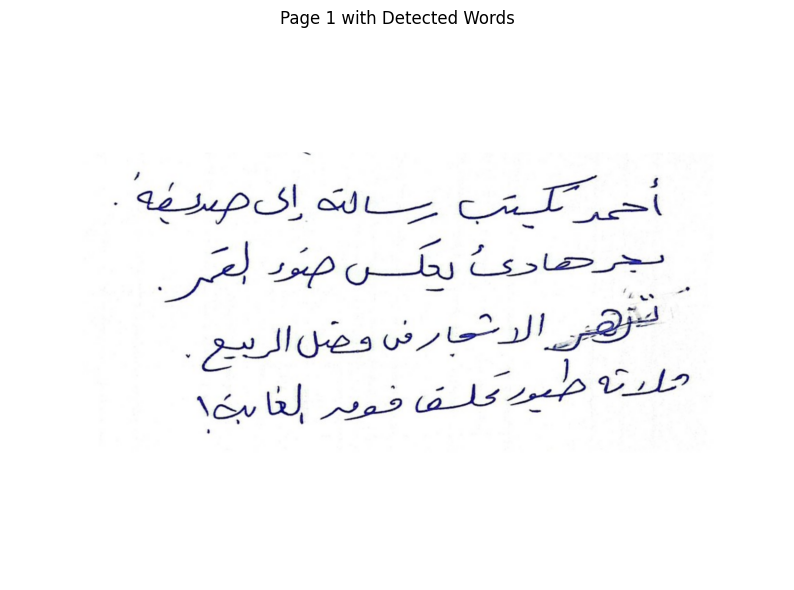

Combined PDF saved at: t1_OCR_combined.pdf
Arabic OCR text saved at: t1_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/t1.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


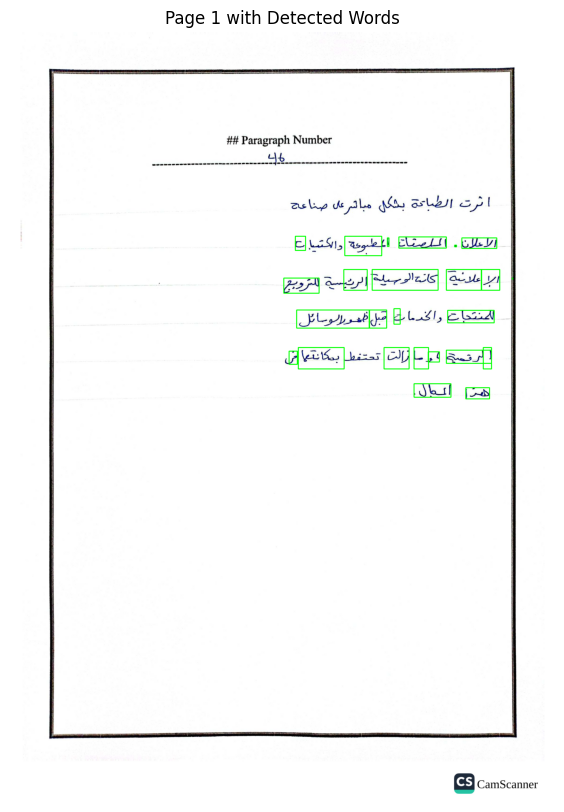

Processing page number -  1


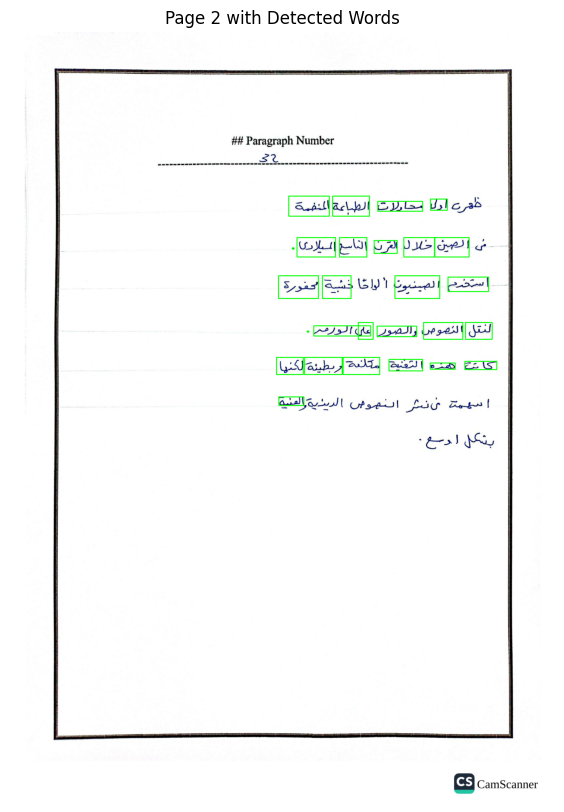

Processing page number -  2


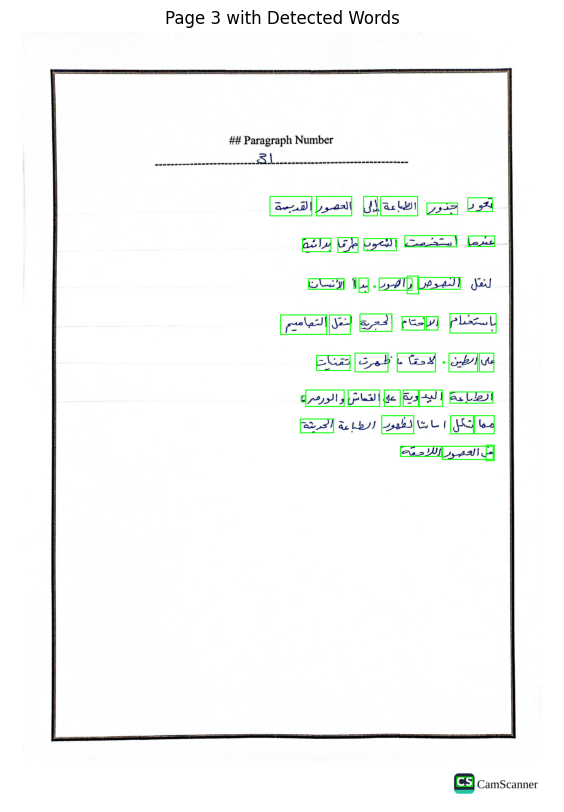

Processing page number -  3


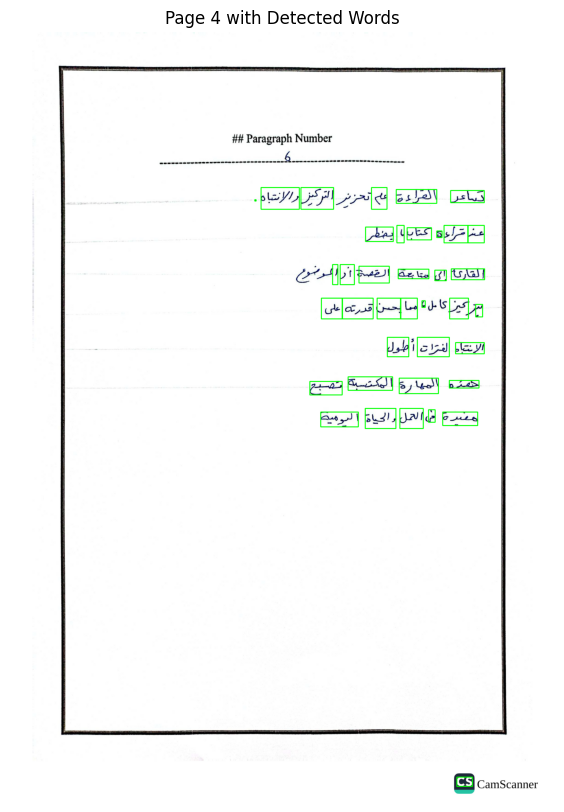

Processing page number -  4


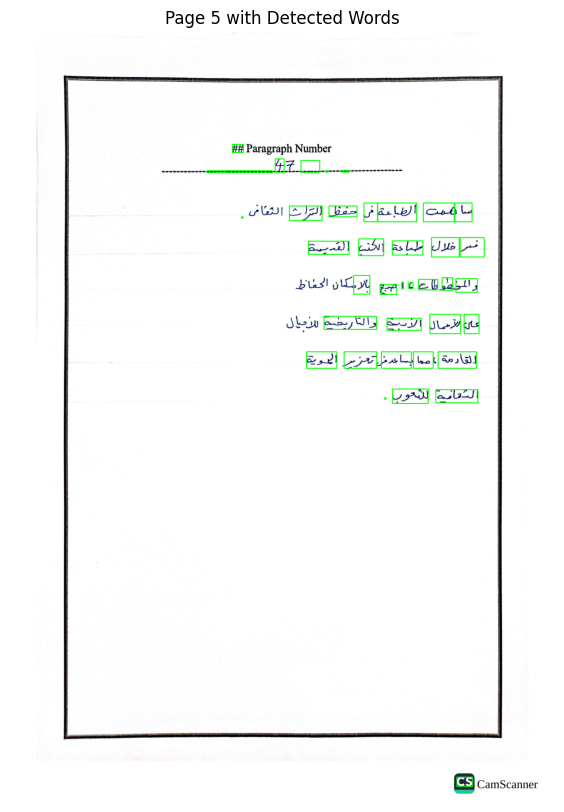

Combined PDF saved at: Noura_Maklad_P1_OCR_combined.pdf
Arabic OCR text saved at: Noura_Maklad_P1_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/Noura_Maklad_P1.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


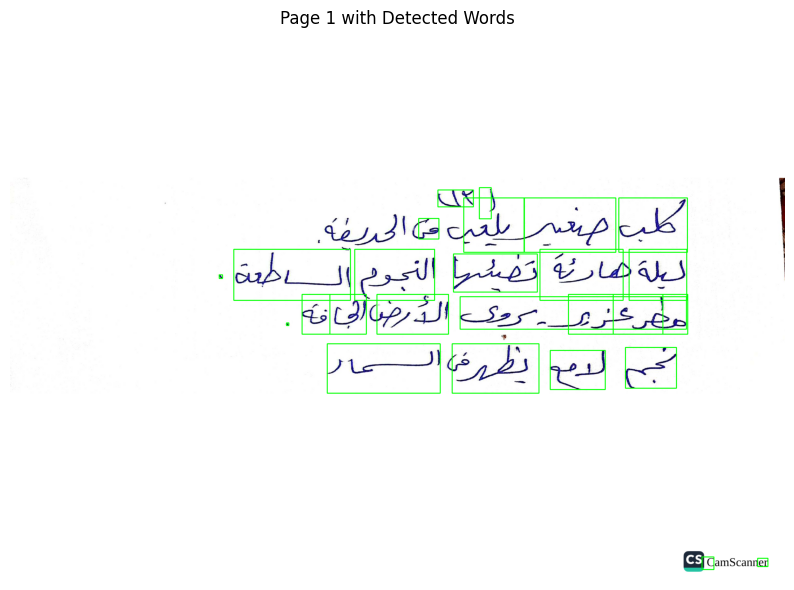

Combined PDF saved at: 13_OCR_combined.pdf
Arabic OCR text saved at: 13_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/13.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


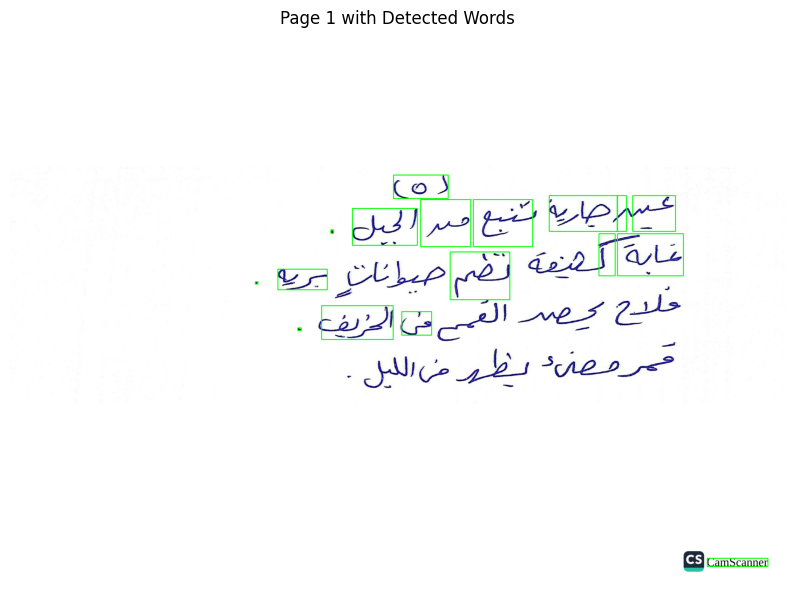

Combined PDF saved at: 5_OCR_combined.pdf
Arabic OCR text saved at: 5_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/5.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number -  0


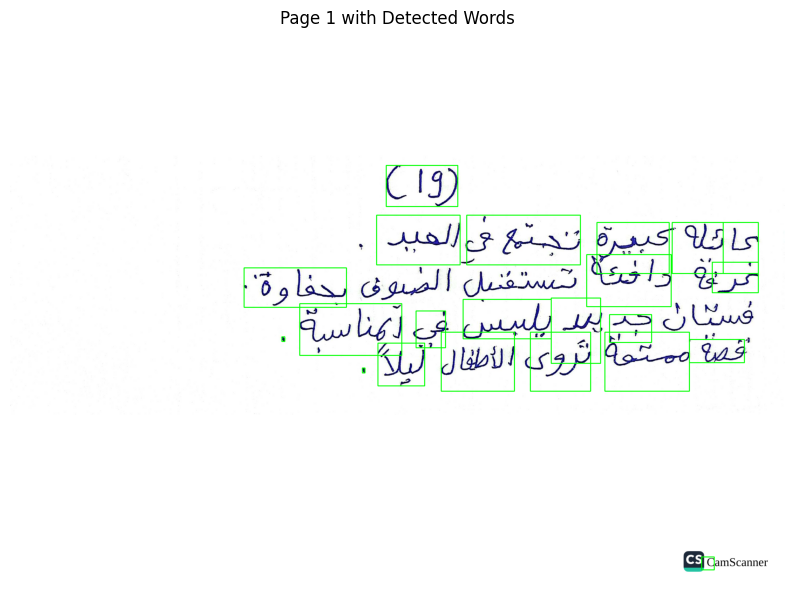

Combined PDF saved at: 19_OCR_combined.pdf
Arabic OCR text saved at: 19_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/19.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print("Processing page number - ", page_number)

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
يقدر الليل والنهار علم أن لن تحصوه فتاب عليكم فاقرءوا ما تيسر من القرآن علم أن سيكون منكم مرضى وآخرون يضربون في الارض يبتغون من فضل الله وآخرون يقاتلون في سبيل الله فاقرءوا ما تيسر منه وأقيموا الصلاة وآتوا الزكاة وأقرضوا الله قرضا حسنا وما تقدموا لأنفسكم من خير تجدوه عند الله هو خيرا وأعظم أجرا واستغفروا الله إن الله غفور رحيم  الآلاف بلد ثبات العبث الأمواج جمل الافتتاح البخاخ دخان اتخاذ ذنب يجتاز زرع يقاس حشائش شاشه لبنان كثير الارزاق قبله يتفرغ ظالم الحظ اسقاط طائر صلاة الرصاص الاقتراض ضد 
---------------------------------------



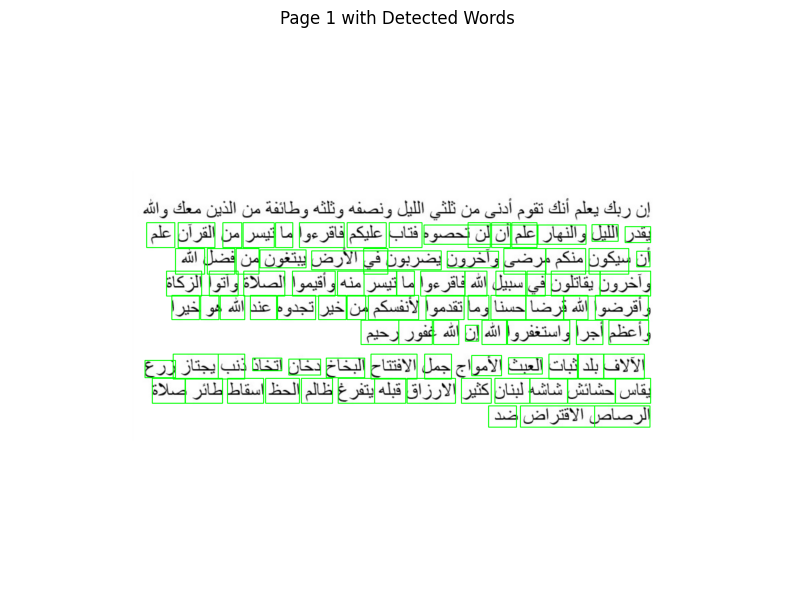

Combined PDF saved at: test_20_OCR_combined.pdf
Arabic OCR text saved at: test_20_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/test_20.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
تمئل_القرار ة ‏ أداةٌ كحالة لبناء الثمة بالنفنى. كلما تحلم العيد 1 00 دن خلال الكت ؤاد ملعوره )#5 تجا  819 عا و بنفسهة . تساعغد هزه النشقة المكتسبة عن مواجهة المواقف  لمختلنة رحرأة و! يجابية ؟ كبر 
---------------------------------------



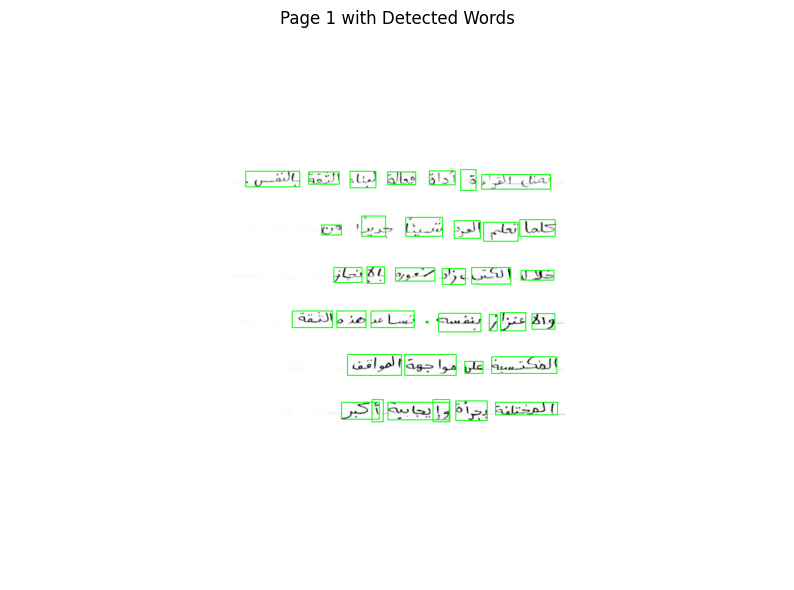

Combined PDF saved at: t2_OCR_combined.pdf
Arabic OCR text saved at: t2_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/t2.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
الاعلان . اللصعت ا مطبوىه والكتسا نج  ‎١‏ امل علدشة كاتةالوسيلة إلرثب المزوبتم  ‏امستكحاية و اقينا ته صل قهورالوسائل ( لرقميج ). سا زالت تحتف بمكانتها ض  ‏كب مهال  ‎  
---------------------------------------



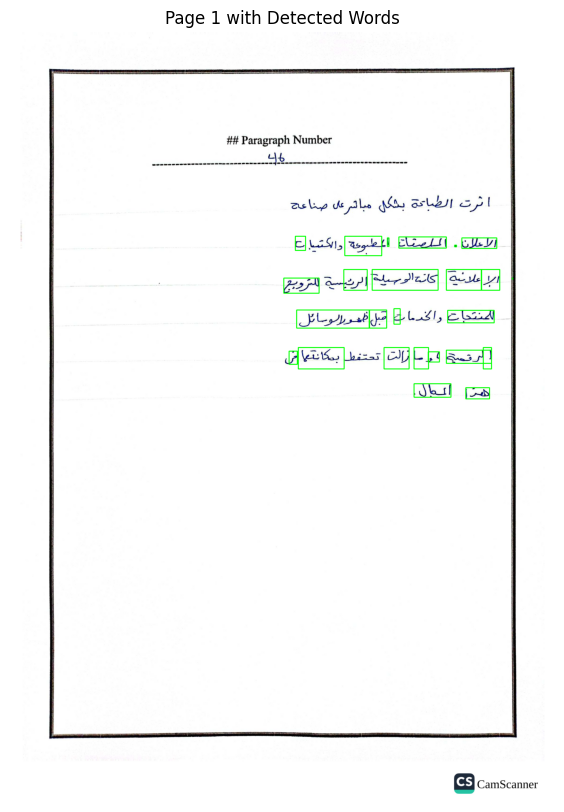

Processing page number - 2

--- OCR Text for Page 2 ---
طهر ارل محارلات الماعة المنفية  ني انصين خلال العرن الاسم البلادكا . استخرم الصينيوت 1لوامًا خشية كفورة لنتل التُصوصن والصور عىل الورمم . كاكة .هده الدفنية مكلدة ربطيئة لكنيا  المشه          
---------------------------------------



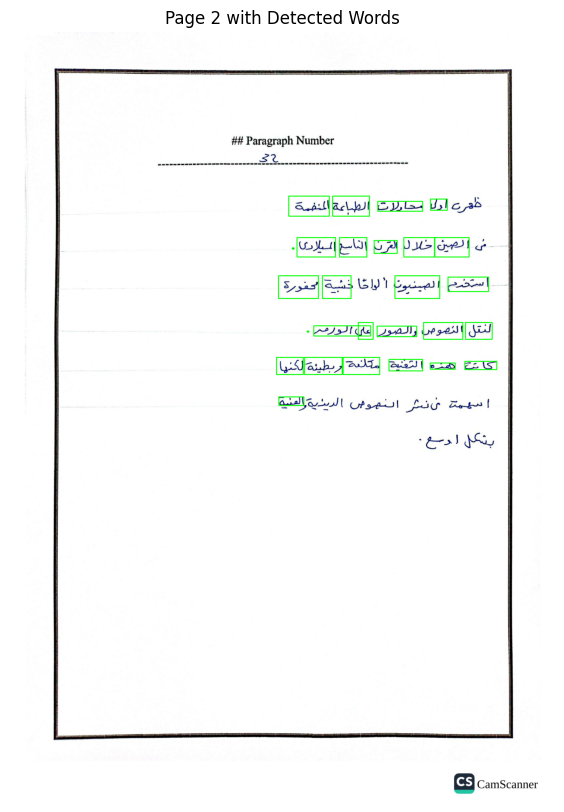

Processing page number - 3

--- OCR Text for Page 3 ---
كود حذور الطماعة لاق الحصور القربسة عسصا.. استخصت التعوب ورا براسُة  لفل النهوضص ر اضرر . مر 1 الائسان  باستخيام ابر حتاع الخحرهة لمعل التماميم  على الطين . لادعً ‏ ظطهرت تقنات الطباعد اليد وبة عي الحماش والورمر » مما مكل اساءنا لظهور 0  ص الخصور اللاحمع     05 
---------------------------------------



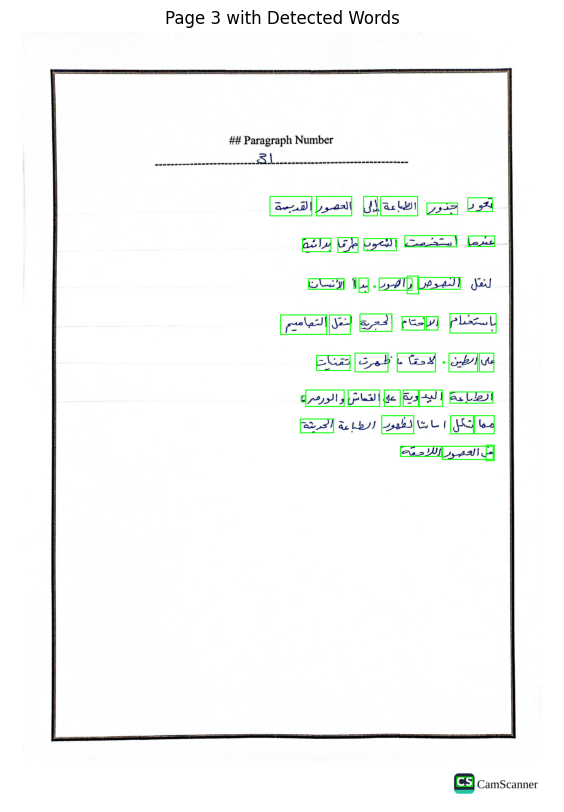

Processing page number - 4

--- OCR Text for Page 4 ---
كاعر _.الصليو عم تحزن التركيز رالإنتاه .  عش صراء 5 كتاب يا يططر  القاركة اى ستابعة القصه أر ا روم س كيز كال » مما يحسن قررته على الإخاء_ لندرت طول  حمده المهارة المكتسبة تصبع  مشية ى القل راكياة الرومية     05 
---------------------------------------



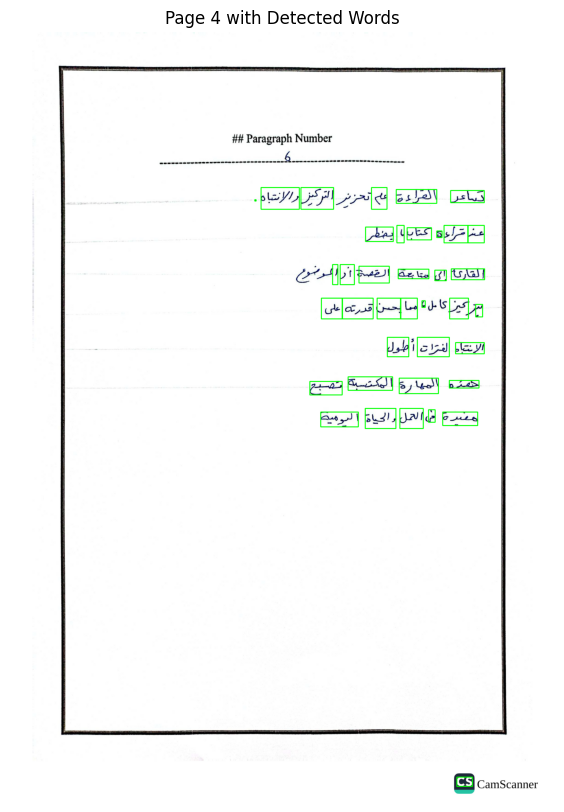

Processing page number - 5

--- OCR Text for Page 5 ---
اء تقلطا أممعودعه! 8#  تت | بي 2 م  سا ممت الطاعة فى حفظ اليراث الثماغ ,  .مس خلال مساعة ااكته القَدسِية  والمئ 2 طات > ‎١‏ صبع بالا كان قاط  على تاعمال الزنيية والتاريضيه بلزميال القادعة مما ماغرض تمزس ادوية  الكعائية للتخوب. .     05 
---------------------------------------



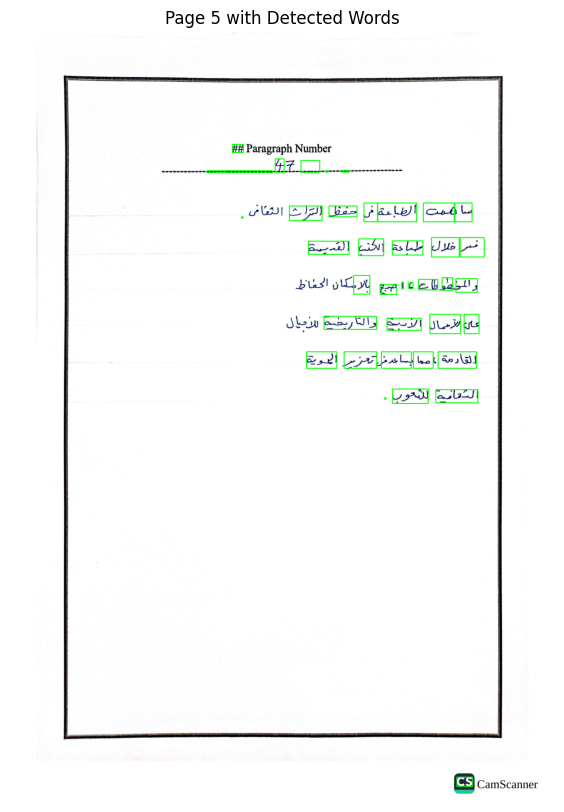

Combined PDF saved at: Noura_Maklad_P1_OCR_combined.pdf
Arabic OCR text saved at: Noura_Maklad_P1_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/Noura_Maklad_P1.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
: ( كك كلن فيخس علفي © الور رغ ليلة ضمارئة تضمسسا التهوم ال_الطعة . و مرغع رو _سروك الدرضه افا عه .  نحى لرمه وطررق الهار  2) 1 
---------------------------------------



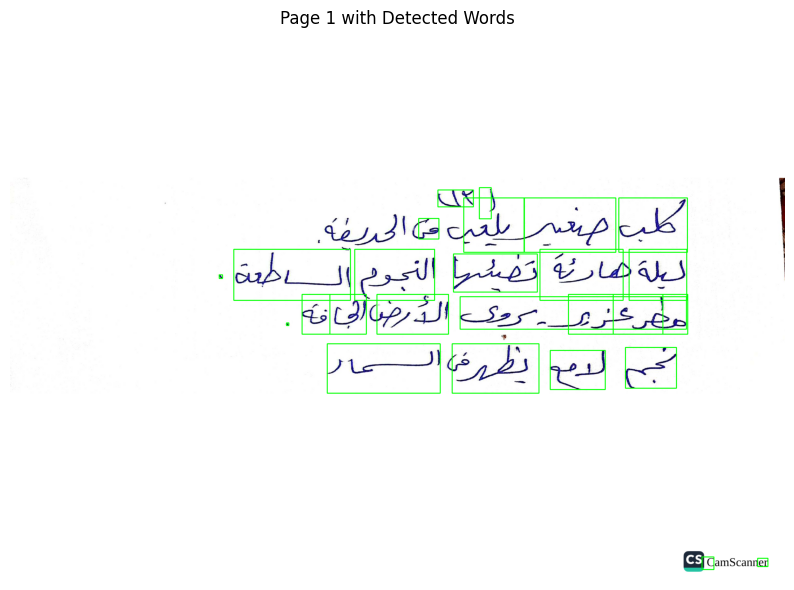

Combined PDF saved at: 13_OCR_combined.pdf
Arabic OCR text saved at: 13_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/13.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
(56 ا  و7 عاى مومع عان الدار: ا 1 اميا مترككة العزكة الباردة 0 كعبان درحق نير الكشئ اشن الإوملة ,  2) 1 
---------------------------------------



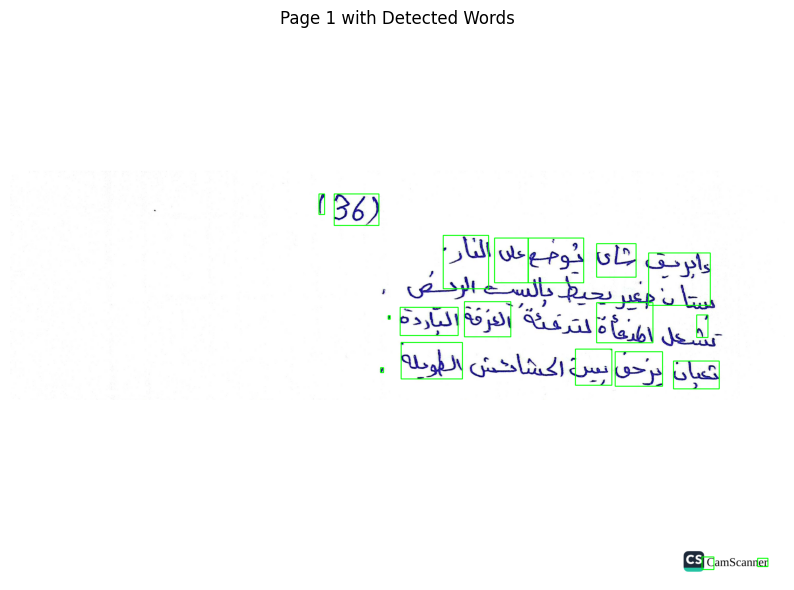

Combined PDF saved at: 36_OCR_combined.pdf
Arabic OCR text saved at: 36_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/36.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")


Processing page number - 1

--- OCR Text for Page 1 ---
دا صقريطم_ جرم الصاو الى ]و . ملف دونز بنحء_رلة عام طرالى مركن وريسوى لمابر ‎٠‏  2) 1 
---------------------------------------



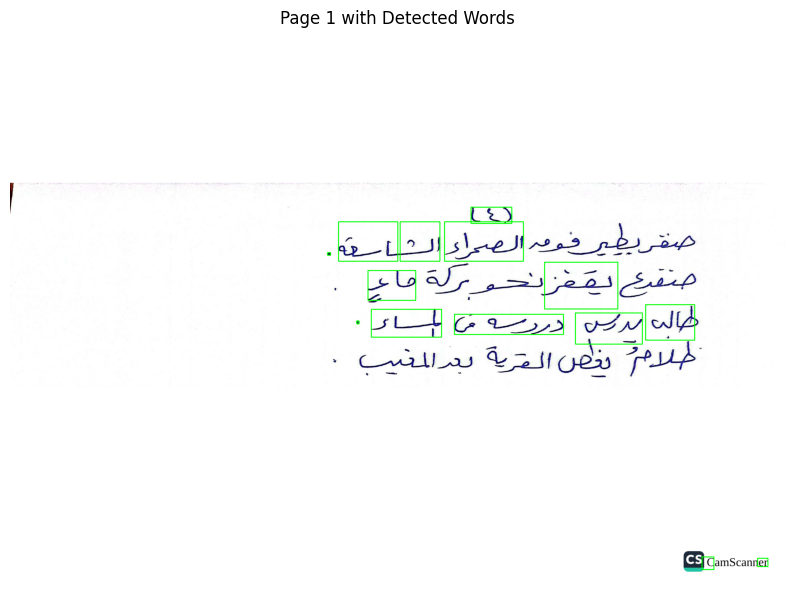

Combined PDF saved at: 4_OCR_combined.pdf
Arabic OCR text saved at: 4_Arabic.txt


In [ ]:
import os
import io
from PIL import Image
from pdf2image import convert_from_path
import pytesseract
from PyPDF2 import PdfWriter, PdfReader
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the input PDF file. Modify as needed
filePath = '/content/4.pdf'

# Convert PDF to images
doc = convert_from_path(filePath)

# Extract file information
path, fileName = os.path.split(filePath)
fileBaseName, fileExtension = os.path.splitext(fileName)

# Set Tesseract OCR command path
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Initialize PDF writer
pdf_writer = PdfWriter()

# List to store OCR text for each page
ocr_text_list = []

# Iterate through each page in the PDF
for page_number, page_data in enumerate(doc):
    print(f"Processing page number - {page_number + 1}")

    # Convert PIL image to OpenCV image
    open_cv_image = cv2.cvtColor(np.array(page_data), cv2.COLOR_RGB2BGR)

    # Perform OCR for Arabic language
    arabic_text = pytesseract.image_to_string(page_data, lang="ara")
    arabic_text = arabic_text.replace("\n", " ")
    ocr_text_list.append(arabic_text)

    # --- NEW: Print OCR text to terminal ---
    print(f"\n--- OCR Text for Page {page_number + 1} ---")
    print(arabic_text)
    print("---------------------------------------\n")

    # Word-level OCR data (bounding boxes)
    data = pytesseract.image_to_data(page_data, lang="ara", output_type=pytesseract.Output.DICT)

    # Draw rectangles for each detected word
    for i in range(len(data['text'])):
        if int(data['conf'][i]) > 0 and data['text'][i].strip() != "":
            (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
            cv2.rectangle(open_cv_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the image with rectangles (optional)
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2RGB))
    plt.title(f"Page {page_number + 1} with Detected Words")
    plt.axis('off')
    plt.show()

    # Get a searchable PDF from the OCR result
    pdf = pytesseract.image_to_pdf_or_hocr(page_data, extension='pdf', lang="ara")

    # Append the page to the output PDF
    page = PdfReader(io.BytesIO(pdf)).pages[0]
    pdf_writer.add_page(page)

# Write the combined PDF to a file
output_pdf_path = '{}_OCR_combined.pdf'.format(fileBaseName)
with open(output_pdf_path, 'wb') as output_pdf:
    pdf_writer.write(output_pdf)

# Write the extracted OCR text to a text file
output_text_path = '{}_Arabic.txt'.format(fileBaseName)
with open(output_text_path, 'w', encoding='utf-8') as output_text_file:
    for page_number, arabic_text in enumerate(ocr_text_list):
        output_text_file.write(f"Page {page_number + 1}:\n{arabic_text}\n\n")

# Print output file paths
print(f"Combined PDF saved at: {output_pdf_path}")
print(f"Arabic OCR text saved at: {output_text_path}")
